In [11]:
target_rd = 3000

import pandas as pd
df_cd4 = pd.read_csv('output_CD4.csv',index_col=0)
df_cd8 = pd.read_csv('output_CD8.csv',index_col=0)
df_cd8

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
AAACCTGAGACAATAC.4-BC,0.390973,0.172813,0.000445,0.358348,0.427015,1.813246,0.328663
AAACCTGAGACTAGAT.4-BC,0.418080,0.177028,-0.094013,0.383024,0.466445,2.078607,0.362474
AAACCTGAGCGATATA.2-BC,0.344344,0.081496,-0.107105,0.282740,0.320198,2.036196,0.419374
AAACCTGCAATGGACG.3-BC,0.384334,0.051841,-0.093443,0.171443,0.275161,1.694198,0.155956
AAACCTGGTCGGCTCA.2-BC,0.495054,0.281622,0.106206,0.412810,0.564206,1.644257,0.190470
...,...,...,...,...,...,...,...
TTTACTGAGATAGGAG.32-FTC,0.365834,0.147752,-0.009562,0.185494,0.372206,1.914002,0.180648
TTTATGCGTGAGGCTA.32-FTC,0.310427,0.104303,-0.063728,0.272077,0.540590,1.909253,0.207078
TTTCCTCTCCATGCTC.32-FTC,0.479679,0.275353,0.103058,0.344905,0.740882,1.362869,0.191914
TTTGGTTGTCTCAACA.32-FTC,0.629869,0.466696,0.330235,0.513946,0.599688,1.801229,0.204095


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


pos_sigs_CD8 = [
    "CD8_Lowery_pos_243g", 
    "CD8_Oliveira_TTE_100g", 
    "CD8_Oliveira_pos_74g", 
    "CD8_Yost_CD8_Exh_100g", 
    "CD8_ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    "CD8_ave_Hanada_neg_5g", 
    "CD8_ave_Oliveira_virus_26g"
]

pos_sigs_CD4 = [
    "CD4_ave_Hanada_pos_9g", 
    "CD4_Caushi_Tfh2_66g", 
    "CD4_Lowery_pos_40g", 
    "CD4_Oh_CXCL13_50g"
]
neg_sigs_CD4 = [
    "CD4_Lowery_neg_37g", 
    "CD4_ave_Hanada_neg_4g"
]


def classify_cells(df, cell_type, pos_sigs, neg_sigs):
    sub = df.copy()
    cols = pos_sigs + neg_sigs

    # z‐score the signatures _within_ this subset
    z_pos = sub[pos_sigs].apply(zscore)
    z_neg = sub[neg_sigs].apply(zscore)

    # compute mean “pos” and “neg” scores
    sub[f"pos_score_{cell_type}"] = z_pos.mean(axis=1)
    sub[f"neg_score_{cell_type}"] = z_neg.mean(axis=1)

    # pick cutoffs (here: median)
    pos_cut = sub[f"pos_score_{cell_type}"].median()
    neg_cut = sub[f"neg_score_{cell_type}"].median()

    # classify per cell
    sub[f"cancer_reactive_per_cell_{cell_type}"] = (
        (sub[f"pos_score_{cell_type}"] >  pos_cut) &
        (sub[f"neg_score_{cell_type}"] <  neg_cut)
    )

    return sub, pos_cut, neg_cut

# run it for each cell‐type
cd8_called,pos_cut_CD8, neg_cut_CD8= classify_cells(df_cd8, "CD8", pos_sigs_CD8, neg_sigs_CD8)
cd4_called,pos_cut_CD4, neg_cut_CD4 = classify_cells(df_cd4, "CD4", pos_sigs_CD4, neg_sigs_CD4)
cd8_called

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGACAATAC.4-BC,0.390973,0.172813,0.000445,0.358348,0.427015,1.813246,0.328663,-0.047641,0.386171,False
AAACCTGAGACTAGAT.4-BC,0.418080,0.177028,-0.094013,0.383024,0.466445,2.078607,0.362474,-0.055344,0.896644,False
AAACCTGAGCGATATA.2-BC,0.344344,0.081496,-0.107105,0.282740,0.320198,2.036196,0.419374,-0.704890,1.092309,False
AAACCTGCAATGGACG.3-BC,0.384334,0.051841,-0.093443,0.171443,0.275161,1.694198,0.155956,-0.878166,-0.543887,False
AAACCTGGTCGGCTCA.2-BC,0.495054,0.281622,0.106206,0.412810,0.564206,1.644257,0.190470,0.751949,-0.458053,True
...,...,...,...,...,...,...,...,...,...,...
TTTACTGAGATAGGAG.32-FTC,0.365834,0.147752,-0.009562,0.185494,0.372206,1.914002,0.180648,-0.488431,-0.135798,False
TTTATGCGTGAGGCTA.32-FTC,0.310427,0.104303,-0.063728,0.272077,0.540590,1.909253,0.207078,-0.472387,-0.024631,False
TTTCCTCTCCATGCTC.32-FTC,0.479679,0.275353,0.103058,0.344905,0.740882,1.362869,0.191914,0.762072,-0.833384,True
TTTGGTTGTCTCAACA.32-FTC,0.629869,0.466696,0.330235,0.513946,0.599688,1.801229,0.204095,1.922335,-0.184461,True


In [3]:
df_combined = pd.concat([cd4_called, cd8_called],
                     axis=0,          # stack rows
                     ignore_index=False,
                     sort=False)
df_combined

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGAACTGTA.2-BC,0.157470,0.673072,0.207838,-0.075306,0.769627,1.977568,-0.104910,0.747264,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGTATCGAA.2-BC,0.216457,0.641330,0.074904,-0.055370,0.828087,2.616164,-0.121834,1.534248,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCACAACTGT.3-BC,-0.011721,0.561036,-0.010851,-0.053051,0.645200,2.254504,-0.926505,0.671474,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGGTGATGCCC.2-BC,-0.010140,0.607741,0.122220,-0.105275,0.716355,2.649422,-0.716204,1.439689,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGGTGTATGGG.3-BC,-0.075250,0.517121,0.178315,-0.168754,0.672267,1.494335,-0.935237,-0.612082,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACTGAGATAGGAG.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365834,0.147752,-0.009562,0.185494,0.372206,1.914002,0.180648,-0.488431,-0.135798,False
TTTATGCGTGAGGCTA.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310427,0.104303,-0.063728,0.272077,0.540590,1.909253,0.207078,-0.472387,-0.024631,False
TTTCCTCTCCATGCTC.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479679,0.275353,0.103058,0.344905,0.740882,1.362869,0.191914,0.762072,-0.833384,True
TTTGGTTGTCTCAACA.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629869,0.466696,0.330235,0.513946,0.599688,1.801229,0.204095,1.922335,-0.184461,True


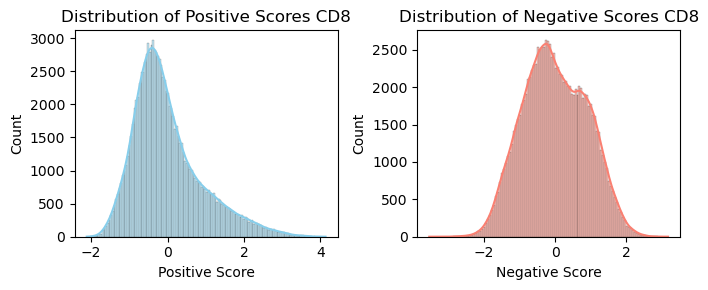

In [4]:
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.histplot(cd8_called['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd8_called['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

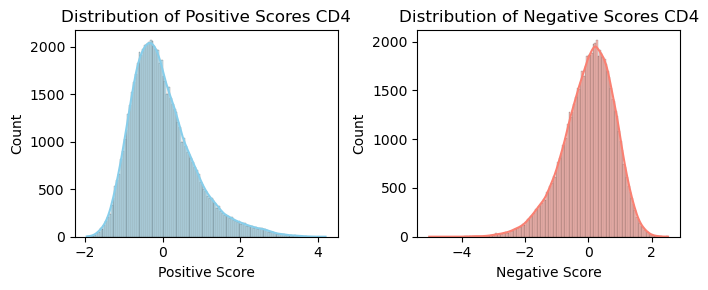

In [5]:
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.histplot(cd4_called['pos_score_CD4'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD4')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd4_called['neg_score_CD4'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD4')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

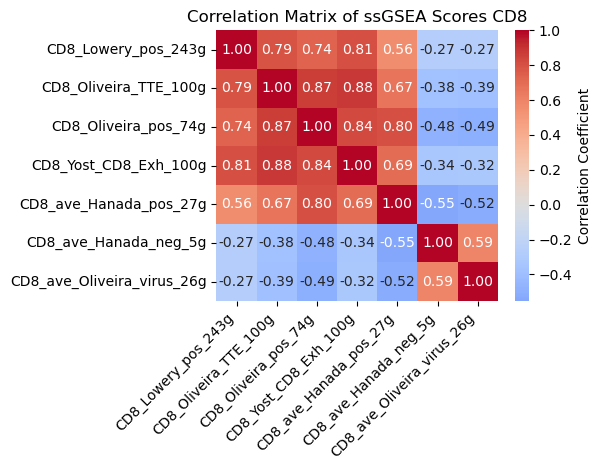

In [6]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd8_called[all_sigs_CD8].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4.8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

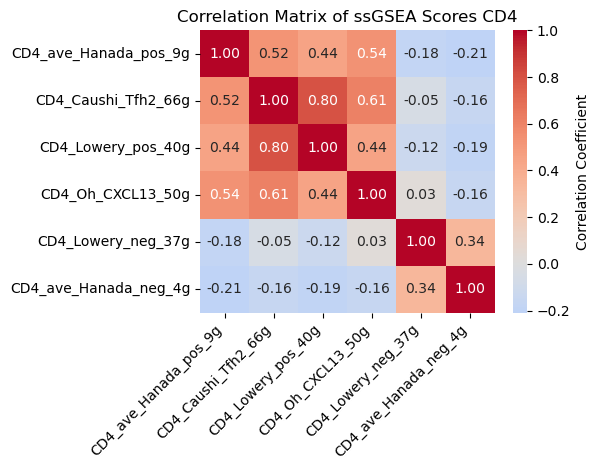

In [7]:
# Combine the lists to get all columns
all_sigs_CD4 = pos_sigs_CD4 + neg_sigs_CD4

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd4_called[all_sigs_CD4].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4.8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD4")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Clustering based on signature genes

In [8]:
import pickle
with open("signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})

del sigs_CD4['Jansen_TermDiff_73g']
del sigs_CD8['Lowery_neg_99g']

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [22]:
import scanpy as sc
import glob
import os

def read_table(path, **kwargs):
    """Convenience for gzipped TSV with rownames in col 0."""
    return pd.read_csv(path, sep="\t", index_col=0, compression="gzip", **kwargs)

DATA_DIR = "GSE156728"

meta_fp = os.path.join(DATA_DIR, "GSE156728_metadata.txt.gz")
meta = read_table(meta_fp)

l = ['BC','BCL','ESCA','MM','PACA','RC','THCA','UCEC','OV','FTC']

# List to store the processed AnnData objects
adatas = []

for i in l:
    df_path = glob.glob(os.path.join(DATA_DIR, f"*{i}_10X.CD8.counts.txt.gz"))[0]
    df = read_table(df_path)
    
    adata = sc.AnnData(df.T)
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    adata.obs = adata.obs.join(meta)
    print(adata)

    new_index = [bc + f"-{i}" for bc in adata.obs.index]
    adata.obs.index = new_index

    sc.pp.normalize_total(adata, target_sum=target_rd)
    sc.pp.log1p(adata)  # log transform

    # Append the AnnData object to the list
    adatas.append(adata)

# Concatenate all adatas into one single AnnData object
adata_CD8 = sc.concat(adatas, label='batch', keys=l, join='inner')

AnnData object with n_obs × n_vars = 4291 × 24148
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 3482 × 28855
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 12526 × 24148
    obs: 'n_g

In [19]:
adatas = []

for i in l:
    df_path = glob.glob(os.path.join(DATA_DIR, f"*{i}_10X.CD4.counts.txt.gz"))[0]
    df = read_table(df_path)
    
    adata = sc.AnnData(df.T)
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    adata.obs = adata.obs.join(meta)
    print(adata)

    new_index = [bc + f"-{i}" for bc in adata.obs.index]
    adata.obs.index = new_index

    median_depth = np.median(adata.obs['total_counts'].values)
    sc.pp.normalize_total(adata, target_sum=median_depth)
    sc.pp.log1p(adata)  # log transform

    # Append the AnnData object to the list
    adatas.append(adata)

# Concatenate all adatas into one single AnnData object
adata_CD4 = sc.concat(adatas, label='batch', keys=l, join='inner')

AnnData object with n_obs × n_vars = 3063 × 24148
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 4237 × 28855
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 12358 × 24148
    obs: 'n_g

In [23]:
print(adata_CD8.shape)
print(adata_CD4.shape)


(109089, 24148)
(74824, 24148)


In [24]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
all_genes_flat_CD4 = [item for sublist in sigs_CD4.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))
subset_genes_CD4 = list(set(all_genes_flat_CD4))

In [25]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata_CD8.var.index):
        matched_genes_CD8.append(s1)
for s1 in subset_genes_CD4:
    if s1 in list(adata_CD4.var.index):
        matched_genes_CD4.append(s1)    
# Print match info
print(f" {len(matched_genes_CD4)}/{len(subset_genes_CD4)} CD4 genes are found.")
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 159/164 CD4 genes are found.
 391/396 CD8 genes are found.


/Users/wsun/anaconda3/envs/CAT/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_76768/3515297629.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(sub_adata, resolution=0.5)


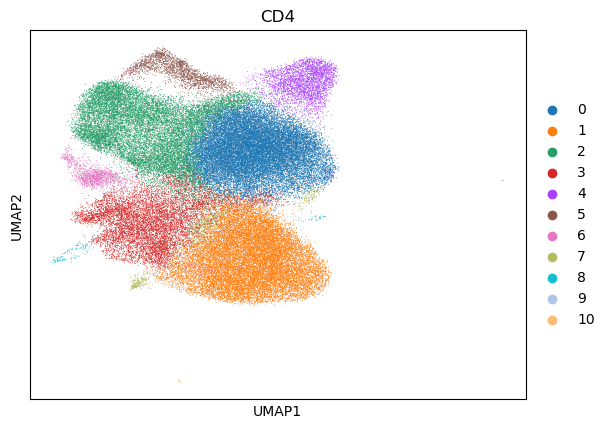

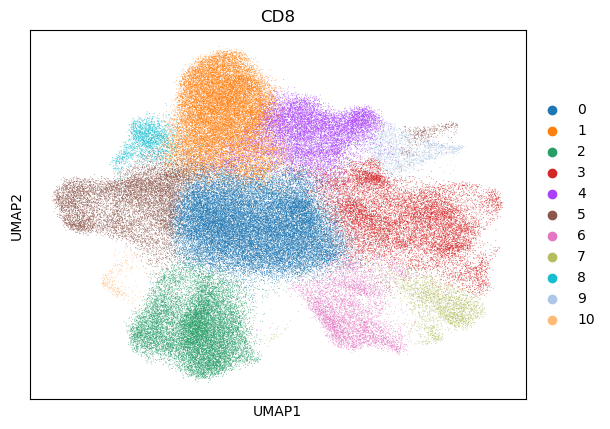

In [26]:
%matplotlib inline
def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.5)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs["leiden"].rename(f"cluster_{key}")

leiden_cd4 = run_cluster(adata_concat_CD4[:, matched_genes_CD4].copy(), "CD4")
leiden_cd8 = run_cluster(adata_concat[:, matched_genes_CD8].copy(), "CD8")

clusters_wide = pd.concat([leiden_cd4, leiden_cd8], axis=1)


In [27]:
merged_df = df_combined.join(clusters_wide[['cluster_CD4','cluster_CD8']])

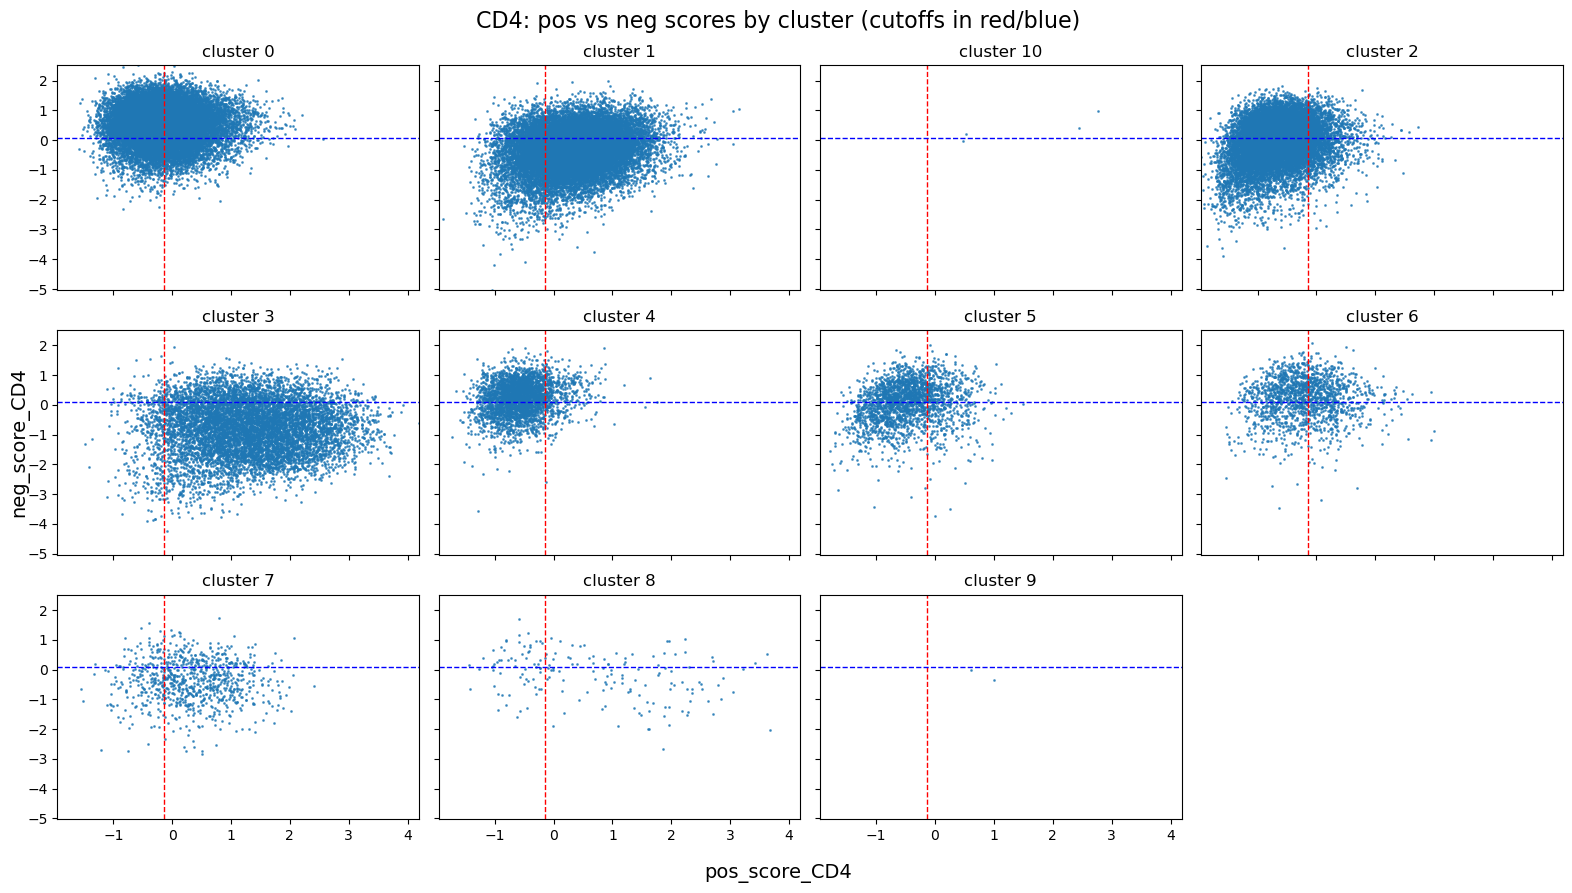

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clusters = [c for c in merged_df['cluster_CD4'].unique() if pd.notna(c)]
clusters = sorted(clusters)

# global axis limits
xmin, xmax = merged_df['pos_score_CD4'].min(), merged_df['pos_score_CD4'].max()
ymin, ymax = merged_df['neg_score_CD4'].min(), merged_df['neg_score_CD4'].max()

# layout
n = len(clusters)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4*ncols, 3*nrows),
    sharex=True, sharey=True
)

for ax, clu in zip(axes.flat, clusters):
    sub = merged_df[merged_df['cluster_CD4'] == clu]
    
    # scatter
    ax.scatter(
        sub['pos_score_CD4'],
        sub['neg_score_CD4'],
        s=1,
        alpha=0.7
    )
    
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# turn off any unused subplots
for ax in axes.flat[n:]:
    ax.axis('off')

# global labels & title
fig.supxlabel('pos_score_CD4', fontsize=14)
fig.supylabel('neg_score_CD4', fontsize=14)
fig.suptitle('CD4: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

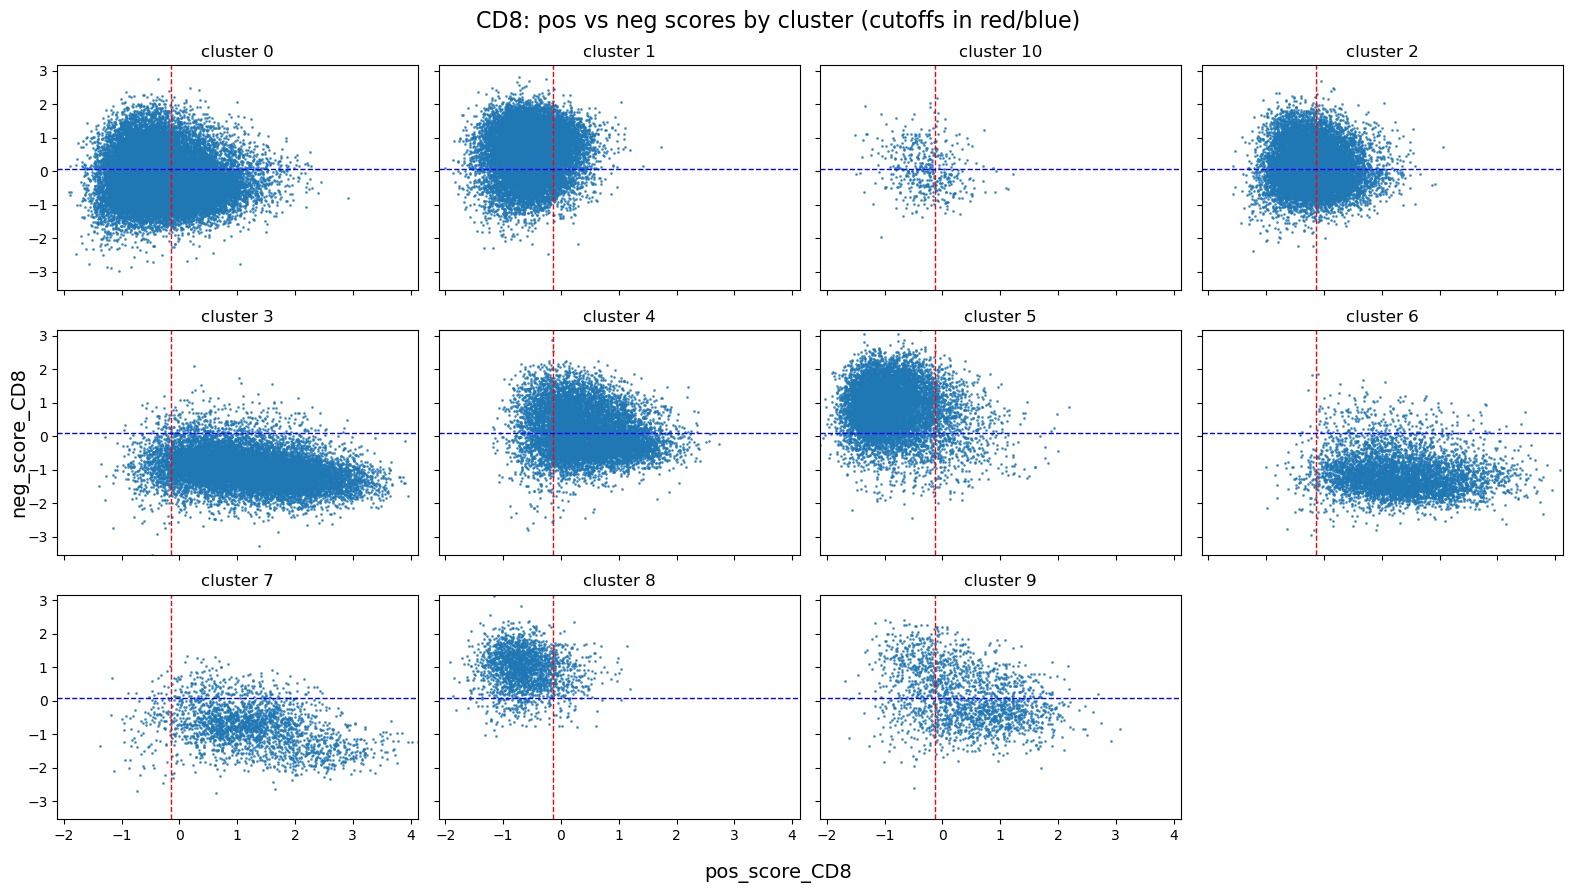

In [29]:
clusters_cd8 = [c for c in merged_df['cluster_CD8'].unique() if pd.notna(c)]
clusters_cd8 = sorted(clusters_cd8)

# compute global axis limits for CD8
xmin8, xmax8 = merged_df['pos_score_CD8'].min(), merged_df['pos_score_CD8'].max()
ymin8, ymax8 = merged_df['neg_score_CD8'].min(), merged_df['neg_score_CD8'].max()

# layout: 4 columns, as many rows as needed
n8 = len(clusters_cd8)
ncols8 = 4
nrows8 = int(np.ceil(n8 / ncols8))

fig8, axes8 = plt.subplots(
    nrows8, ncols8,
    figsize=(4*ncols8, 3*nrows8),
    sharex=True, sharey=True
)

for ax, clu in zip(axes8.flat, clusters_cd8):
    sub8 = merged_df[merged_df['cluster_CD8'] == clu]
    
    # scatter
    ax.scatter(
        sub8['pos_score_CD8'],
        sub8['neg_score_CD8'],
        s=1,
        alpha=0.7
    )
    
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin8, xmax8)
    ax.set_ylim(ymin8, ymax8)

# disable unused subplots
for ax in axes8.flat[n8:]:
    ax.axis('off')

# global labels & title
fig8.supxlabel('pos_score_CD8', fontsize=14)
fig8.supylabel('neg_score_CD8', fontsize=14)
fig8.suptitle('CD8: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

In [30]:
merged_df["cell_type_by_cluster"] = merged_df["cluster_CD4"].notna().map({True: "CD4", False: "CD8"})

In [31]:
merged_df["cluster"] = merged_df.apply(
    lambda r: r["cluster_CD4"] if r["cell_type_by_cluster"] == "CD4"
              else r["cluster_CD8"],
    axis=1
)

merged_df["cancer_reactive_per_cell"] = merged_df.apply(
    lambda r: r["cancer_reactive_per_cell_CD4"] if r["cell_type_by_cluster"] == "CD4"
              else r["cancer_reactive_per_cell_CD8"],
    axis=1
)

# Group by both cell_type & cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby(["cell_type_by_cluster", "cluster"])["cancer_reactive_per_cell"]
    .mean()
    .rename("reactive_fraction")
)

cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df

,cell_type_by_cluster,cluster,reactive_fraction
0,CD4,0,0.097896
1,CD4,1,0.536134
2,CD4,10,0.250000
3,CD4,2,0.054509
4,CD4,3,0.787394
5,CD4,4,0.035231
6,CD4,5,0.103326
7,CD4,6,0.168448
8,CD4,7,0.548907
9,CD4,8,0.431818


In [32]:
#  threshold and collect all (cell_type, cluster) pairs above it
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs


{('CD4', '1'),
 ('CD4', '3'),
 ('CD4', '7'),
 ('CD4', '8'),
 ('CD4', '9'),
 ('CD8', '3'),
 ('CD8', '6'),
 ('CD8', '7'),
 ('CD8', '9')}

In [33]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if (r["cell_type_by_cluster"], r["cluster"]) in reactive_pairs
              else False,
    axis=1
)
merged_df

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8_Lowery_pos_243g,...,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8,cell_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster
AAACCTGAGAACTGTA.2-BC,0.157470,0.673072,0.207838,-0.075306,0.769627,1.977568,-0.104910,0.747264,False,NaN,...,NaN,NaN,NaN,NaN,0,NaN,CD4,0,False,False
AAACCTGAGTATCGAA.2-BC,0.216457,0.641330,0.074904,-0.055370,0.828087,2.616164,-0.121834,1.534248,False,NaN,...,NaN,NaN,NaN,NaN,0,NaN,CD4,0,False,False
AAACCTGCACAACTGT.3-BC,-0.011721,0.561036,-0.010851,-0.053051,0.645200,2.254504,-0.926505,0.671474,False,NaN,...,NaN,NaN,NaN,NaN,0,NaN,CD4,0,False,False
AAACCTGGTGATGCCC.2-BC,-0.010140,0.607741,0.122220,-0.105275,0.716355,2.649422,-0.716204,1.439689,False,NaN,...,NaN,NaN,NaN,NaN,5,NaN,CD4,5,False,False
AAACCTGGTGTATGGG.3-BC,-0.075250,0.517121,0.178315,-0.168754,0.672267,1.494335,-0.935237,-0.612082,False,NaN,...,NaN,NaN,NaN,NaN,0,NaN,CD4,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACTGAGATAGGAG.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365834,...,0.180648,-0.488431,-0.135798,False,NaN,0,CD8,0,False,False
TTTATGCGTGAGGCTA.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310427,...,0.207078,-0.472387,-0.024631,False,NaN,0,CD8,0,False,False
TTTCCTCTCCATGCTC.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479679,...,0.191914,0.762072,-0.833384,True,NaN,9,CD8,9,True,True
TTTGGTTGTCTCAACA.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629869,...,0.204095,1.922335,-0.184461,True,NaN,4,CD8,4,True,False


# Join with TCR data

In [34]:
vdj = read_table(os.path.join(DATA_DIR,"GSE156728_10X_VDJ.merge.txt.gz"))
print("VDJ merge:", vdj.shape)
vdj

VDJ merge: (442618, 15)


,is_cell,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,library.id
barcode,,,,,,,,,,,,,,,
AAACGGGAGCCACCTG.1,True,True,705,TRB,TRBV20-1,TRBD1,TRBJ1-5,TRBC1,True,True,CSAKKQGSNQPQHF,TGCAGTGCCAAAAAACAGGGTTCCAATCAGCCCCAGCATTTT,103056,25,BC-P20190403-N
AAACGGGAGCCACCTG.1,True,True,494,TRB,NaN,NaN,TRBJ1-5,TRBC1,False,NaN,NaN,NaN,31683,7,BC-P20190403-N
AAACGGGAGCCACCTG.1,True,True,560,TRA,TRAV38-2DV8,NaN,TRAJ48,TRAC,True,True,CAYRSRISNFGNEKLTF,TGTGCTTATAGGAGCCGAATATCTAACTTTGGAAATGAGAAATTAA...,32169,9,BC-P20190403-N
AAACGGGCAAAGAATC.1,True,True,732,TRB,TRBV3-1,NaN,TRBJ2-7,TRBC2,True,True,CASSQVDGYEQYF,TGTGCCAGCAGCCAAGTCGACGGCTACGAGCAGTACTTC,108675,37,BC-P20190403-N
AAACGGGCAAAGAATC.1,True,True,503,TRA,TRAV9-2,NaN,TRAJ56,TRAC,True,True,CALTDTGANSKLTF,TGTGCTCTGACCGATACTGGAGCCAATAGTAAGCTGACATTT,40131,11,BC-P20190403-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCGTATAATGG.88,True,True,790,Multi,NaN,NaN,TRBJ1-4,TRBC1,False,NaN,NaN,NaN,1099,1,UCEC-P20190911-T
TTTGCGCTCAACGGCC.88,True,True,532,TRB,TRBV20-1,TRBD1,TRBJ2-7,TRBC2,True,True,CSAMGNLGVYEQYF,TGCAGTGCCATGGGGAATTTGGGGGTTTACGAGCAGTACTTC,13492,9,UCEC-P20190911-T
TTTGCGCTCAACGGCC.88,True,True,580,TRA,TRAV13-1,NaN,TRAJ52,TRAC,True,True,CAASKGGGTSYGKLTF,TGTGCAGCAAGTAAGGGTGGTGGTACTAGCTATGGAAAGCTGACATTT,3268,2,UCEC-P20190911-T


In [35]:
# Extract the prefix from library.id
prefix = vdj['library.id'].str.split('-').str[0]

# Create new index by appending the prefix to the current index
vdj.index = vdj.index.astype(str) + '-' + prefix

In [36]:
vdj['TCR_entry_number'] = vdj.groupby(vdj.index).cumcount()
vdj = vdj[vdj["chain"].isin(["TRA", "TRB"])]
vdj

,is_cell,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,library.id,TCR_entry_number
AAACGGGAGCCACCTG.1-BC,True,True,705,TRB,TRBV20-1,TRBD1,TRBJ1-5,TRBC1,True,True,CSAKKQGSNQPQHF,TGCAGTGCCAAAAAACAGGGTTCCAATCAGCCCCAGCATTTT,103056,25,BC-P20190403-N,0
AAACGGGAGCCACCTG.1-BC,True,True,494,TRB,NaN,NaN,TRBJ1-5,TRBC1,False,NaN,NaN,NaN,31683,7,BC-P20190403-N,1
AAACGGGAGCCACCTG.1-BC,True,True,560,TRA,TRAV38-2DV8,NaN,TRAJ48,TRAC,True,True,CAYRSRISNFGNEKLTF,TGTGCTTATAGGAGCCGAATATCTAACTTTGGAAATGAGAAATTAA...,32169,9,BC-P20190403-N,2
AAACGGGCAAAGAATC.1-BC,True,True,732,TRB,TRBV3-1,NaN,TRBJ2-7,TRBC2,True,True,CASSQVDGYEQYF,TGTGCCAGCAGCCAAGTCGACGGCTACGAGCAGTACTTC,108675,37,BC-P20190403-N,0
AAACGGGCAAAGAATC.1-BC,True,True,503,TRA,TRAV9-2,NaN,TRAJ56,TRAC,True,True,CALTDTGANSKLTF,TGTGCTCTGACCGATACTGGAGCCAATAGTAAGCTGACATTT,40131,11,BC-P20190403-N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCGTATAATGG.88-UCEC,True,True,689,TRA,TRAV3,NaN,TRAJ31,TRAC,True,True,CAVRGGSGNNARLMF,TGTGCTGTGAGAGGGGGGTCCGGTAACAATGCCAGACTCATGTTT,1878,2,UCEC-P20190911-T,1
TTTGCGCTCAACGGCC.88-UCEC,True,True,532,TRB,TRBV20-1,TRBD1,TRBJ2-7,TRBC2,True,True,CSAMGNLGVYEQYF,TGCAGTGCCATGGGGAATTTGGGGGTTTACGAGCAGTACTTC,13492,9,UCEC-P20190911-T,0
TTTGCGCTCAACGGCC.88-UCEC,True,True,580,TRA,TRAV13-1,NaN,TRAJ52,TRAC,True,True,CAASKGGGTSYGKLTF,TGTGCAGCAAGTAAGGGTGGTGGTACTAGCTATGGAAAGCTGACATTT,3268,2,UCEC-P20190911-T,1
TTTGTCAAGTAGGCCA.88-UCEC,True,True,484,TRA,TRAV2,NaN,TRAJ21,TRAC,True,True,CAVETNNFNKFYF,TGTGCTGTGGAGACCAACAACTTCAACAAATTTTACTTT,10943,4,UCEC-P20190911-T,0


In [37]:
df_final = (
    merged_df
    .join(vdj)   # left‐join by index & column
)

# Set multi-index with barcode and TCR_entry_number
df_final = df_final.set_index('TCR_entry_number', append=True)
df_final

CD4_Caushi_Tfh2_66g  \
                        TCR_entry_number                        
AAACCTGAGAACTGTA.2-BC   0.0                          0.157470   
                        2.0                          0.157470   
AAACCTGAGTATCGAA.2-BC   0.0                          0.216457   
                        1.0                          0.216457   
AAACCTGCACAACTGT.3-BC   0.0                         -0.011721   
...                                                       ...   
TTTACTGAGATAGGAG.32-FTC NaN                               NaN   
TTTATGCGTGAGGCTA.32-FTC NaN                               NaN   
TTTCCTCTCCATGCTC.32-FTC NaN                               NaN   
TTTGGTTGTCTCAACA.32-FTC NaN                               NaN   
TTTGGTTTCGGCGCAT.32-FTC NaN                               NaN   

                                          CD4_Lowery_neg_37g  \
                        TCR_entry_number                       
AAACCTGAGAACTGTA.2-BC   0.0                         0.673072   
                        2.0                         0.673072   
AAACCTGAGTATCGAA.2-BC   0.0                         0.641330   
                        1.0                         0.641330   
AAACCTGCACAACTGT.3-BC   0.0                         0.561036   
...                                                      ...   
TTTACTGAGATAGGAG.32-FTC NaN                              NaN   
TTTATGCGTGAGGCTA.32-FTC NaN                              NaN   
TTTCCTCTCCATGCTC.32-FTC NaN                              NaN   
TTTGGTTGTCTCAACA.32-FTC NaN                              NaN   
TTTGGTTTCGGCGCAT.32-FTC NaN                              NaN   

                                          CD4_Lowery_pos_40g  \
                        TCR_entry_number                       
AAACCTGAGAACTGTA.2-BC   0.0                         0.207838   
                        2.0                         0.207838   
AAACCTGAGTATCGAA.2-BC   0.0                         0.074904   
                        1.0                         0.074904   
AAACCTGCACAACTGT.3-BC   0.0                        -0.010851   
...                                                      ...   
TTTACTGAGATAGGAG.32-FTC NaN                              NaN   
TTTATGCGTGAGGCTA.32-FTC NaN                              NaN   
TTTCCTCTCCATGCTC.32-FTC NaN                              NaN   
TTTGGTTGTCTCAACA.32-FTC NaN                              NaN   
TTTGGTTTCGGCGCAT.32-FTC NaN                              NaN   

                                          CD4_Oh_CXCL13_50g  \
                        TCR_entry_number                      
AAACCTGAGAACTGTA.2-BC   0.0                       -0.075306   
                        2.0                       -0.075306   
AAACCTGAGTATCGAA.2-BC   0.0                       -0.055370   
                        1.0                       -0.055370   
AAACCTGCACAACTGT.3-BC   0.0                       -0.053051   
...                                                     ...   
TTTACTGAGATAGGAG.32-FTC NaN                             NaN   
TTTATGCGTGAGGCTA.32-FTC NaN                             NaN   
TTTCCTCTCCATGCTC.32-FTC NaN                             NaN   
TTTGGTTGTCTCAACA.32-FTC NaN                             NaN   
TTTGGTTTCGGCGCAT.32-FTC NaN                             NaN   

                                          CD4_ave_Hanada_pos_9g  \
                        TCR_entry_number                          
AAACCTGAGAACTGTA.2-BC   0.0                            0.769627   
                        2.0                            0.769627   
AAACCTGAGTATCGAA.2-BC   0.0                            0.828087   
                        1.0                            0.828087   
AAACCTGCACAACTGT.3-BC   0.0                            0.645200   
...                                                         ...   
TTTACTGAGATAGGAG.32-FTC NaN                                 NaN   
TTTATGCGTGAGGCTA.32-FTC NaN                                 NaN   
TTTCCTCTCCATGCTC.32-FTC NaN             

In [38]:
out_CD4 = df_final[df_final["cell_type_by_cluster"]=='CD4']
out_CD8 = df_final[df_final["cell_type_by_cluster"]=='CD8']
out_CD8 = out_CD8.dropna(axis=1, how='all')
out_CD4 = out_CD4.dropna(axis=1, how='all')
pd.set_option('display.max_columns', None)
out_CD8

CD8_Lowery_pos_243g  \
                        TCR_entry_number                        
AAACCTGAGACAATAC.4-BC   0.0                          0.390973   
                        2.0                          0.390973   
AAACCTGAGACTAGAT.4-BC   0.0                          0.418080   
                        1.0                          0.418080   
AAACCTGAGCGATATA.2-BC   0.0                          0.344344   
...                                                       ...   
TTTACTGAGATAGGAG.32-FTC NaN                          0.365834   
TTTATGCGTGAGGCTA.32-FTC NaN                          0.310427   
TTTCCTCTCCATGCTC.32-FTC NaN                          0.479679   
TTTGGTTGTCTCAACA.32-FTC NaN                          0.629869   
TTTGGTTTCGGCGCAT.32-FTC NaN                          0.563573   

                                          CD8_Oliveira_TTE_100g  \
                        TCR_entry_number                          
AAACCTGAGACAATAC.4-BC   0.0                            0.172813   
                        2.0                            0.172813   
AAACCTGAGACTAGAT.4-BC   0.0                            0.177028   
                        1.0                            0.177028   
AAACCTGAGCGATATA.2-BC   0.0                            0.081496   
...                                                         ...   
TTTACTGAGATAGGAG.32-FTC NaN                            0.147752   
TTTATGCGTGAGGCTA.32-FTC NaN                            0.104303   
TTTCCTCTCCATGCTC.32-FTC NaN                            0.275353   
TTTGGTTGTCTCAACA.32-FTC NaN                            0.466696   
TTTGGTTTCGGCGCAT.32-FTC NaN                            0.247122   

                                          CD8_Oliveira_pos_74g  \
                        TCR_entry_number                         
AAACCTGAGACAATAC.4-BC   0.0                           0.000445   
                        2.0                           0.000445   
AAACCTGAGACTAGAT.4-BC   0.0                          -0.094013   
                        1.0                          -0.094013   
AAACCTGAGCGATATA.2-BC   0.0                          -0.107105   
...                                                        ...   
TTTACTGAGATAGGAG.32-FTC NaN                          -0.009562   
TTTATGCGTGAGGCTA.32-FTC NaN                          -0.063728   
TTTCCTCTCCATGCTC.32-FTC NaN                           0.103058   
TTTGGTTGTCTCAACA.32-FTC NaN                           0.330235   
TTTGGTTTCGGCGCAT.32-FTC NaN                           0.117606   

                                          CD8_Yost_CD8_Exh_100g  \
                        TCR_entry_number                          
AAACCTGAGACAATAC.4-BC   0.0                            0.358348   
                        2.0                            0.358348   
AAACCTGAGACTAGAT.4-BC   0.0                            0.383024   
                        1.0                            0.383024   
AAACCTGAGCGATATA.2-BC   0.0                            0.282740   
...                                                         ...   
TTTACTGAGATAGGAG.32-FTC NaN                            0.185494   
TTTATGCGTGAGGCTA.32-FTC NaN                            0.272077   
TTTCCTCTCCATGCTC.32-FTC NaN                            0.344905   
TTTGGTTGTCTCAACA.32-FTC NaN                            0.513946   
TTTGGTTTCGGCGCAT.32-FTC NaN                            0.439099   

                                          CD8_ave_Hanada_pos_27g  \
                        TCR_entry_number                           
AAACCTGAGACAATAC.4-BC   0.0                             0.427015   
                        2.0                             0.427015   
AAACCTGAGACTAGAT.4-BC   0.0                             0.466445   
                        1.0                             0.466445   
AAACCTGAGCGATATA.2-BC   0.0                             0.320198   
...                                                          ...   
TTTACTGAGATAGGAG.32-FTC NaN                      

In [39]:
out_CD8.to_csv("cell_meta_data_CD8.csv", index=True)
out_CD4.to_csv("cell_meta_data_CD4.csv", index=True)

In [40]:
df_ab  = out_CD8.reset_index().rename(columns={'level_0':'cell_id'}).copy()

# For each cell_id × chain, grab the row with the highest UMI count
idx = df_ab.groupby(['cell_id','chain'])['umis'].idxmax()
df_best = df_ab.loc[idx]

tcr_cols = df_best.columns[17:31].tolist() 
meta_cols = [c for c in df_best.columns
             if c not in tcr_cols + ['chain','cell_id']]

print("TCR columns:")
print(tcr_cols)
print("Metadata columns:")
print(meta_cols)

# Extract metadata: take first row per cell_id
df_meta = (
    df_best
    .groupby('cell_id')[meta_cols]
    .first()
)

df_alpha = (
    df_best
    .loc[df_best['chain']=='TRA', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Alpha)')
)
df_beta = (
    df_best
    .loc[df_best['chain']=='TRB', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Beta)')
)


TCR columns:
['is_cell', 'high_confidence', 'length', 'chain', 'v_gene', 'd_gene', 'j_gene', 'c_gene', 'full_length', 'productive', 'cdr3', 'cdr3_nt', 'reads', 'umis']
Metadata columns:
['TCR_entry_number', 'CD8_Lowery_pos_243g', 'CD8_Oliveira_TTE_100g', 'CD8_Oliveira_pos_74g', 'CD8_Yost_CD8_Exh_100g', 'CD8_ave_Hanada_pos_27g', 'CD8_ave_Hanada_neg_5g', 'CD8_ave_Oliveira_virus_26g', 'pos_score_CD8', 'neg_score_CD8', 'cancer_reactive_per_cell_CD8', 'cluster_CD8', 'cell_type_by_cluster', 'cluster', 'cancer_reactive_per_cell', 'cancer_reactive_by_cluster', 'library.id']


In [41]:
df_final = (
    df_meta
    .join(df_alpha, how='inner')
    .join(df_beta, how='inner')
    .reset_index()
)
df_final.drop(columns='TCR_entry_number', axis=1, inplace=True)

In [42]:
df_final

,cell_id,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cell_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,library.id,is_cell(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),is_cell(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta)
0,AAACCTGAGAAGGACA.77-UCEC,0.379747,0.265144,0.079206,0.361312,0.423891,1.524274,0.061351,0.230238,-1.195414,True,3,CD8,3,True,True,UCEC-P20190213-N,True,True,624.0,TRA,TRAV1-2,NaN,TRAJ32,TRAC,True,True,CAVDYGGATNKLIF,TGTGCTGTCGATTATGGTGGTGCTACAAACAAGCTCATCTTT,2618.0,3.0,True,True,551.0,TRB,TRBV6-1,NaN,TRBJ1-4,TRBC1,True,True,CASSESVGHEKLFF,TGTGCCAGCAGTGAATCCGTCGGGCATGAAAAACTGTTTTTT,12030.0,18.0
1,AAACCTGAGACAATAC.4-BC,0.390973,0.172813,0.000445,0.358348,0.427015,1.813246,0.328663,-0.047641,0.386171,False,8,CD8,8,False,False,BC-P20190123-T,True,True,523.0,TRA,TRAV1-2,NaN,TRAJ12,TRAC,True,True,CAVMDSSYKLIF,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,3635.0,6.0,True,True,717.0,TRB,TRBV6-1,TRBD1,TRBJ2-3,TRBC1,True,True,CASSEAPGQGADTQYF,TGTGCCAGCAGTGAAGCTCCGGGACAGGGGGCAGATACGCAGTATTTT,3333.0,5.0
2,AAACCTGAGACAATAC.56-THCA,0.384201,0.288044,0.196217,0.387184,0.561916,1.707466,0.093619,0.636218,-0.803286,True,3,CD8,3,True,True,THCA-P20190108-N,True,True,566.0,TRA,TRAV26-2,NaN,TRAJ45,TRAC,True,True,CILRDVLYSGGGADGLTF,TGCATCCTGAGAGACGTTCTGTATTCAGGAGGAGGTGCTGACGGAC...,8429.0,8.0,True,True,593.0,TRB,TRBV3-1,TRBD1,TRBJ2-3,TRBC2,True,True,CASSPQGALKVDTQYF,TGTGCCAGCAGCCCACAGGGGGCGCTTAAAGTAGATACGCAGTATTTT,14623.0,16.0
3,AAACCTGAGACAGGCT.53-RC,0.455799,0.253714,0.174864,0.319210,1.075324,1.039264,0.000000,1.057803,-2.126436,True,6,CD8,6,True,True,RC-P20190925-T,True,True,626.0,TRA,TRAV41,NaN,TRAJ53,TRAC,True,True,CAVARDSGGGSNYKLTF,TGTGCTGTCGCCCGGGATAGTGGGGGAGGTAGCAACTATAAACTGA...,1029.0,6.0,True,True,574.0,TRB,TRBV6-1,TRBD1,TRBJ2-5,TRBC2,True,True,CARRATGTQETQYF,TGTGCCAGGAGGGCGACAGGGACCCAAGAGACCCAGTACTTC,3363.0,15.0
4,AAACCTGAGACGCACA.27-MM,0.523699,0.220987,0.077370,0.414817,0.655958,1.827762,0.342380,0.739004,0.466904,False,4,CD8,4,False,False,MM-P20190122-T,True,True,564.0,TRA,TRAV1-1,NaN,TRAJ15,TRAC,True,True,CAVSTRGQAGTALIF,TGCGCTGTGAGCACGAGGGGCCAGGCAGGAACTGCTCTGATCTTT,7555.0,17.0,True,True,656.0,TRB,TRBV19,TRBD1,TRBJ1-2,TRBC1,True,True,CASRDAGQAGYTF,TGTGCCAGTAGGGATGCGGGACAGGCTGGCTACACCTTC,3403.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90060,TTTGTCATCTTCGAGA.55-THCA,0.491065,0.283192,0.100950,0.416228,0.549337,1.648299,0.204090,0.730094,-0.391961,True,4,CD8,4,True,False,THCA-P20181226-T,True,True,564.0,TRA,TRAV27,NaN,TRAJ42,TRAC,True,True,CAGAGGGSQGNLIF,TGTGCAGGAGCAGGGGGAGGAAGCCAAGGAAATCTCATCTTT,3594.0,6.0,True,True,707.0,TRB,TRBV19,TRBD1,TRBJ2-3,TRBC2,True,True,CASSGRSTDTQYF,TGTGCCAGCTCGGGCAGGAGCACAGATACGCAGTATTTT,5214.0,11.0
90061,TTTGTCATCTTCTGGC.55-THCA,0.317761,0.153305,-0.108172,0.191237,0.266175,2.052700,0.336236,-0.819761,0.744740,False,1,CD8,1,False,False,THCA-P20181226-T,True,True,579.0,TRA,TRAV27,NaN,TRAJ42,TRAC,True,True,CAGAGGGSQGNLIF,TGTGCAGGAGCAGGGGGAGGAAGCCAAGGAAATCTCATCTTT,2122.0,3.0,True,True,722.0,TRB,TRBV19,TRBD1,TRBJ2-3,TRBC2,True,True,CASSGRSTDTQYF,TGTGCCAGCTCGGGCAGGAGCACAGATACGCAGTATTTT,3330.0,7.0
90062,TTTGTCATCTTGGGTA.34-OV,0.562375,0.377153,0.220385,0.486433,0.704446,1.501593,0.174435,1.497907,-0.722961,True,9,CD8,9,True,True,OV-P20190304-T,True,True,514.0,TRA,TRAV35,NaN,TRAJ49,TRAC,True,True,CAGHPLNTGNQFYF,TGTGCTGGGCATCCTTTGAACACCGGTAACCAGTTCTATTTT,247

In [43]:
df_final.to_csv("cell_meta_data_CD8_cleaned.csv", index=False)

In [45]:
out_CD4 = pd.read_csv('cell_meta_data_CD4.csv', index_col = [0,1])
df_ab  = out_CD4.reset_index().rename(columns={'level_0':'cell_id'}).copy()

# For each cell_id × chain, grab the row with the highest UMI count
idx = df_ab.groupby(['cell_id','chain'])['umis'].idxmax()
df_best = df_ab.loc[idx]

tcr_cols = df_best.columns[16:30].tolist() 
meta_cols = [c for c in df_best.columns
             if c not in tcr_cols + ['chain','cell_id']]

print("TCR columns:")
print(tcr_cols)
print("Metadata columns:")
print(meta_cols)

# Extract metadata: take first row per cell_id
df_meta = (
    df_best
    .groupby('cell_id')[meta_cols]
    .first()
)

df_alpha = (
    df_best
    .loc[df_best['chain']=='TRA', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Alpha)')
)
df_beta = (
    df_best
    .loc[df_best['chain']=='TRB', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Beta)')
)
df_final = (
    df_meta
    .join(df_alpha, how='inner')
    .join(df_beta, how='inner')
    .reset_index()
)
df_final.drop(columns='TCR_entry_number', axis=1, inplace=True)
df_final

TCR columns:
['is_cell', 'high_confidence', 'length', 'chain', 'v_gene', 'd_gene', 'j_gene', 'c_gene', 'full_length', 'productive', 'cdr3', 'cdr3_nt', 'reads', 'umis']
Metadata columns:
['TCR_entry_number', 'CD4_Caushi_Tfh2_66g', 'CD4_Lowery_neg_37g', 'CD4_Lowery_pos_40g', 'CD4_Oh_CXCL13_50g', 'CD4_ave_Hanada_pos_9g', 'CD4_ave_Hanada_neg_4g', 'pos_score_CD4', 'neg_score_CD4', 'cancer_reactive_per_cell_CD4', 'cluster_CD4', 'cell_type_by_cluster', 'cluster', 'cancer_reactive_per_cell', 'cancer_reactive_by_cluster', 'library.id']


,cell_id,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cluster_CD4,cell_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,library.id,is_cell(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),is_cell(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta)
0,AAACCTGAGAAACCGC.60-THCA,0.149413,0.398768,0.218287,0.228350,0.646676,2.177484,0.451234,-0.128391,True,3,CD4,3,True,True,THCA-P20190122-N,True,True,528.0,TRA,TRAV1-1,NaN,TRAJ13,TRAC,True,True,CAGPNSGGYQKVTF,TGCGCTGGGCCGAATTCTGGGGGTTACCAGAAAGTTACCTTT,6588.0,8.0,True,True,706.0,TRB,TRBV20-1,TRBD1,TRBJ2-7,TRBC2,True,True,CSASIGGGLRLGEQYF,TGCAGTGCTAGCATAGGGGGGGGTTTAAGGCTGGGCGAGCAGTACTTC,9872.0,18.0
1,AAACCTGAGAACTGTA.2-BC,0.157470,0.673072,0.207838,-0.075306,0.769627,1.977568,-0.104910,0.747264,False,0,CD4,0,False,False,BC-P20190403-T,True,True,493.0,TRA,TRAV9-2,NaN,TRAJ29,TRAC,True,True,CALSRGNTPLVF,TGTGCTCTGAGTAGAGGAAACACACCTCTTGTCTTT,6609.0,5.0,True,True,655.0,TRB,TRBV30,TRBD2,TRBJ1-1,TRBC1,True,True,CAWSPGTVNTEAFF,TGTGCCTGGAGTCCCGGGACGGTGAACACTGAAGCTTTCTTT,25215.0,29.0
2,AAACCTGAGAAGGACA.63-THCA,-0.034373,0.558596,0.101832,-0.053103,0.772688,2.473635,-0.615907,0.977392,False,2,CD4,2,False,False,THCA-P20190125-T,True,True,496.0,TRA,TRAV4,NaN,TRAJ9,TRAC,True,True,CLVGSNTGGFKTIF,TGCCTCGTGGGTAGTAATACTGGAGGCTTCAAAACTATCTTT,2938.0,3.0,True,True,646.0,TRB,TRBV28,TRBD1,TRBJ1-2,TRBC1,True,True,CASNRQGEDYGYTF,TGTGCCAGCAATCGACAGGGGGAGGACTATGGCTACACCTTC,2693.0,3.0
3,AAACCTGAGAAGGTGA.39-PACA,0.076960,0.605897,0.152900,0.134470,0.930676,1.872877,0.304986,0.311062,False,0,CD4,0,False,False,PACA-P20190306-T,True,True,542.0,TRA,TRAV26-1,NaN,TRAJ8,TRAC,True,True,CIPDTGFQKLVF,TGCATCCCAGACACAGGCTTTCAGAAACTTGTATTT,3578.0,2.0,True,True,840.0,TRB,TRBV13,NaN,TRBJ1-1,TRBC1,True,True,CASSLEGNTEAFF,TGTGCCAGCAGCTTAGAAGGAAACACTGAAGCTTTCTTT,22881.0,16.0
4,AAACCTGAGACCACGA.61-THCA,0.343885,0.393445,0.436215,-0.043361,1.012797,2.338150,1.029177,0.080911,True,1,CD4,1,True,True,THCA-P20190122-T,True,True,531.0,TRA,TRAV4,NaN,TRAJ21,TRAC,True,True,CLVGGPGTYNFNKFYF,TGCCTCGTGGGTGGCCCGGGAACATACAACTTCAACAAATTTTACTTT,7643.0,19.0,True,True,570.0,TRB,TRBV6-6,TRBD2,TRBJ2-5,TRBC2,True,True,CASRQAGGPSETQYF,TGTGCCAGCAGACAAGCGGGAGGGCCCTCAGAGACCCAGTACTTC,5941.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62961,TTTGTCATCTCTTATG.52-RC,0.061519,0.521188,0.124215,-0.068047,0.701917,2.043767,-0.505618,0.198189,False,0,CD4,0,False,False,RC-P20190925-N,True,True,564.0,TRA,TRAV12-3,NaN,TRAJ37,TRAC,True,True,CAMSRGGSSNTGKLIF,TGTGCAATGAGCAGGGGTGGCTCTAGCAACACAGGCAAACTAATCTTT,4019.0,6.0,True,True,697.0,TRB,TRBV20-1,TRBD1,TRBJ1-1,TRBC1,True,True,CSAGDSLNTEAFF,TGCAGTGCCGGGGACAGCTTGAACACTGAAGCTTTCTTT,3255.0,4.0
62962,TTTGTCATCTGATACG.25-MM,-0.071565,0.630236,0.157890,-0.010425,0.726402,2.073098,-0.540717,0.703341,False,2,CD4,2,False,False,MM-P20181219-T,True,True,695.0,TRA,TRAV8-4,NaN,TRAJ6,TRAC,True,True,CAVRRGPGGSYIPTF,TGTGCTGTGAGGCGGGGCCCAGGAGGAAGCTACATACCTACATTT,14592.0,12.0,True,True,689.0,TRB,TRBV5-1,TRBD2,TRBJ2-1,TRBC2,True,True,CASSLGAGNEQFF,TGCGCCAGCAGCTTGGGAGCAGGTAATGAGCAGTTCTTC,28664.0,22.0
62963,TTTGTCATCTGTCTAT.62-THCA,0.133398,0.497290,0.194015,-0.015675,0.784479,2.251605,-0.023180,0.396736,False,0,CD4,0,False,False,THCA-P20190125-N,True,True,572.0,TRA,TRAV41,NaN,TRAJ42,TRAC,True,True,CAVSGGSQGNLIF,TGTGCTGTCAGTGGAGGAAGCCAAGGAAATCTCATCTTT,310.0,1.0,True,True,919.0,TRB,TRBV5-8,NaN,TRBJ2-7,TRBC1,True,True,CASSLSVNHEQYF,TGTGCCAGCAGCTTGTCAGTGAACCACGAGCAGTACT

In [46]:
df_final.to_csv("cell_meta_data_CD4_cleaned.csv", index=True)

# Process to get TCR Meta Data

In [47]:
import pandas as pd
cell_data_CD8 = pd.read_csv('cell_meta_data_CD8_cleaned.csv', index_col = 0)
cell_data_CD8["cancer_reactive"] = (
    cell_data_CD8["cancer_reactive_per_cell"] 
  & cell_data_CD8["cancer_reactive_by_cluster"]
)
cell_data_CD8

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cell_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,library.id,is_cell(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),is_cell(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta),cancer_reactive
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAGGACA.77-UCEC,0.379747,0.265144,0.079206,0.361312,0.423891,1.524274,0.061351,0.230238,-1.195414,True,3,CD8,3,True,True,UCEC-P20190213-N,True,True,624.0,TRA,TRAV1-2,NaN,TRAJ32,TRAC,True,True,CAVDYGGATNKLIF,TGTGCTGTCGATTATGGTGGTGCTACAAACAAGCTCATCTTT,2618.0,3.0,True,True,551.0,TRB,TRBV6-1,NaN,TRBJ1-4,TRBC1,True,True,CASSESVGHEKLFF,TGTGCCAGCAGTGAATCCGTCGGGCATGAAAAACTGTTTTTT,12030.0,18.0,True
AAACCTGAGACAATAC.4-BC,0.390973,0.172813,0.000445,0.358348,0.427015,1.813246,0.328663,-0.047641,0.386171,False,8,CD8,8,False,False,BC-P20190123-T,True,True,523.0,TRA,TRAV1-2,NaN,TRAJ12,TRAC,True,True,CAVMDSSYKLIF,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,3635.0,6.0,True,True,717.0,TRB,TRBV6-1,TRBD1,TRBJ2-3,TRBC1,True,True,CASSEAPGQGADTQYF,TGTGCCAGCAGTGAAGCTCCGGGACAGGGGGCAGATACGCAGTATTTT,3333.0,5.0,False
AAACCTGAGACAATAC.56-THCA,0.384201,0.288044,0.196217,0.387184,0.561916,1.707466,0.093619,0.636218,-0.803286,True,3,CD8,3,True,True,THCA-P20190108-N,True,True,566.0,TRA,TRAV26-2,NaN,TRAJ45,TRAC,True,True,CILRDVLYSGGGADGLTF,TGCATCCTGAGAGACGTTCTGTATTCAGGAGGAGGTGCTGACGGAC...,8429.0,8.0,True,True,593.0,TRB,TRBV3-1,TRBD1,TRBJ2-3,TRBC2,True,True,CASSPQGALKVDTQYF,TGTGCCAGCAGCCCACAGGGGGCGCTTAAAGTAGATACGCAGTATTTT,14623.0,16.0,True
AAACCTGAGACAGGCT.53-RC,0.455799,0.253714,0.174864,0.319210,1.075324,1.039264,0.000000,1.057803,-2.126436,True,6,CD8,6,True,True,RC-P20190925-T,True,True,626.0,TRA,TRAV41,NaN,TRAJ53,TRAC,True,True,CAVARDSGGGSNYKLTF,TGTGCTGTCGCCCGGGATAGTGGGGGAGGTAGCAACTATAAACTGA...,1029.0,6.0,True,True,574.0,TRB,TRBV6-1,TRBD1,TRBJ2-5,TRBC2,True,True,CARRATGTQETQYF,TGTGCCAGGAGGGCGACAGGGACCCAAGAGACCCAGTACTTC,3363.0,15.0,True
AAACCTGAGACGCACA.27-MM,0.523699,0.220987,0.077370,0.414817,0.655958,1.827762,0.342380,0.739004,0.466904,False,4,CD8,4,False,False,MM-P20190122-T,True,True,564.0,TRA,TRAV1-1,NaN,TRAJ15,TRAC,True,True,CAVSTRGQAGTALIF,TGCGCTGTGAGCACGAGGGGCCAGGCAGGAACTGCTCTGATCTTT,7555.0,17.0,True,True,656.0,TRB,TRBV19,TRBD1,TRBJ1-2,TRBC1,True,True,CASRDAGQAGYTF,TGTGCCAGTAGGGATGCGGGACAGGCTGGCTACACCTTC,3403.0,10.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTTCGAGA.55-THCA,0.491065,0.283192,0.100950,0.416228,0.549337,1.648299,0.204090,0.730094,-0.391961,True,4,CD8,4,True,False,THCA-P20181226-T,True,True,564.0,TRA,TRAV27,NaN,TRAJ42,TRAC,True,True,CAGAGGGSQGNLIF,TGTGCAGGAGCAGGGGGAGGAAGCCAAGGAAATCTCATCTTT,3594.0,6.0,True,True,707.0,TRB,TRBV19,TRBD1,TRBJ2-3,TRBC2,True,True,CASSGRSTDTQYF,TGTGCCAGCTCGGGCAGGAGCACAGATACGCAGTATTTT,5214.0,11.0,False
TTTGTCATCTTCTGGC.55-THCA,0.317761,0.153305,-0.108172,0.191237,0.266175,2.052700,0.336236,-0.819761,0.744740,False,1,CD8,1,False,False,THCA-P20181226-T,True,True,579.0,TRA,TRAV27,NaN,TRAJ42,TRAC,True,True,CAGAGGGSQGNLIF,TGTGCAGGAGCAGGGGGAGGAAGCCAAGGAAATCTCATCTTT,2122.0,3.0,True,True,722.0,TRB,TRBV19,TRBD1,TRBJ2-3,TRBC2,True,True,CASSGRSTDTQYF,TGTGCCAGCTCGGGCAGGAGCACAGATACGCAGTATTTT,3330.0,7.0,False
TTTGTCATCTTGGGTA.34-OV,0.562375,0.377153,0.220385,0.486433,0.704446,1.501593,0.174435,1.497907,-0.722961,True,9,CD8,9,True,True,OV-P20190304-T,True,True,514.0,TRA,TRAV35,NaN,TRAJ49,TRAC

In [48]:
mask = (
    cell_data_CD8['cdr3(Beta)'].notna() & (cell_data_CD8['cdr3(Beta)'] != 'None') &
    cell_data_CD8['cdr3(Alpha)'].notna() & (cell_data_CD8['cdr3(Alpha)'] != 'None')
)
cell_data_CD8 = cell_data_CD8[mask]
cell_data_CD8

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cell_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,library.id,is_cell(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),is_cell(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta),cancer_reactive
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAGGACA.77-UCEC,0.379747,0.265144,0.079206,0.361312,0.423891,1.524274,0.061351,0.230238,-1.195414,True,3,CD8,3,True,True,UCEC-P20190213-N,True,True,624.0,TRA,TRAV1-2,NaN,TRAJ32,TRAC,True,True,CAVDYGGATNKLIF,TGTGCTGTCGATTATGGTGGTGCTACAAACAAGCTCATCTTT,2618.0,3.0,True,True,551.0,TRB,TRBV6-1,NaN,TRBJ1-4,TRBC1,True,True,CASSESVGHEKLFF,TGTGCCAGCAGTGAATCCGTCGGGCATGAAAAACTGTTTTTT,12030.0,18.0,True
AAACCTGAGACAATAC.4-BC,0.390973,0.172813,0.000445,0.358348,0.427015,1.813246,0.328663,-0.047641,0.386171,False,8,CD8,8,False,False,BC-P20190123-T,True,True,523.0,TRA,TRAV1-2,NaN,TRAJ12,TRAC,True,True,CAVMDSSYKLIF,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,3635.0,6.0,True,True,717.0,TRB,TRBV6-1,TRBD1,TRBJ2-3,TRBC1,True,True,CASSEAPGQGADTQYF,TGTGCCAGCAGTGAAGCTCCGGGACAGGGGGCAGATACGCAGTATTTT,3333.0,5.0,False
AAACCTGAGACAATAC.56-THCA,0.384201,0.288044,0.196217,0.387184,0.561916,1.707466,0.093619,0.636218,-0.803286,True,3,CD8,3,True,True,THCA-P20190108-N,True,True,566.0,TRA,TRAV26-2,NaN,TRAJ45,TRAC,True,True,CILRDVLYSGGGADGLTF,TGCATCCTGAGAGACGTTCTGTATTCAGGAGGAGGTGCTGACGGAC...,8429.0,8.0,True,True,593.0,TRB,TRBV3-1,TRBD1,TRBJ2-3,TRBC2,True,True,CASSPQGALKVDTQYF,TGTGCCAGCAGCCCACAGGGGGCGCTTAAAGTAGATACGCAGTATTTT,14623.0,16.0,True
AAACCTGAGACAGGCT.53-RC,0.455799,0.253714,0.174864,0.319210,1.075324,1.039264,0.000000,1.057803,-2.126436,True,6,CD8,6,True,True,RC-P20190925-T,True,True,626.0,TRA,TRAV41,NaN,TRAJ53,TRAC,True,True,CAVARDSGGGSNYKLTF,TGTGCTGTCGCCCGGGATAGTGGGGGAGGTAGCAACTATAAACTGA...,1029.0,6.0,True,True,574.0,TRB,TRBV6-1,TRBD1,TRBJ2-5,TRBC2,True,True,CARRATGTQETQYF,TGTGCCAGGAGGGCGACAGGGACCCAAGAGACCCAGTACTTC,3363.0,15.0,True
AAACCTGAGACGCACA.27-MM,0.523699,0.220987,0.077370,0.414817,0.655958,1.827762,0.342380,0.739004,0.466904,False,4,CD8,4,False,False,MM-P20190122-T,True,True,564.0,TRA,TRAV1-1,NaN,TRAJ15,TRAC,True,True,CAVSTRGQAGTALIF,TGCGCTGTGAGCACGAGGGGCCAGGCAGGAACTGCTCTGATCTTT,7555.0,17.0,True,True,656.0,TRB,TRBV19,TRBD1,TRBJ1-2,TRBC1,True,True,CASRDAGQAGYTF,TGTGCCAGTAGGGATGCGGGACAGGCTGGCTACACCTTC,3403.0,10.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTTCGAGA.55-THCA,0.491065,0.283192,0.100950,0.416228,0.549337,1.648299,0.204090,0.730094,-0.391961,True,4,CD8,4,True,False,THCA-P20181226-T,True,True,564.0,TRA,TRAV27,NaN,TRAJ42,TRAC,True,True,CAGAGGGSQGNLIF,TGTGCAGGAGCAGGGGGAGGAAGCCAAGGAAATCTCATCTTT,3594.0,6.0,True,True,707.0,TRB,TRBV19,TRBD1,TRBJ2-3,TRBC2,True,True,CASSGRSTDTQYF,TGTGCCAGCTCGGGCAGGAGCACAGATACGCAGTATTTT,5214.0,11.0,False
TTTGTCATCTTCTGGC.55-THCA,0.317761,0.153305,-0.108172,0.191237,0.266175,2.052700,0.336236,-0.819761,0.744740,False,1,CD8,1,False,False,THCA-P20181226-T,True,True,579.0,TRA,TRAV27,NaN,TRAJ42,TRAC,True,True,CAGAGGGSQGNLIF,TGTGCAGGAGCAGGGGGAGGAAGCCAAGGAAATCTCATCTTT,2122.0,3.0,True,True,722.0,TRB,TRBV19,TRBD1,TRBJ2-3,TRBC2,True,True,CASSGRSTDTQYF,TGTGCCAGCTCGGGCAGGAGCACAGATACGCAGTATTTT,3330.0,7.0,False
TTTGTCATCTTGGGTA.34-OV,0.562375,0.377153,0.220385,0.486433,0.704446,1.501593,0.174435,1.497907,-0.722961,True,9,CD8,9,True,True,OV-P20190304-T,True,True,514.0,TRA,TRAV35,NaN,TRAJ49,TRAC

In [49]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# ---  short aliases to match dataframe -------------------
# ------------------------------------------------------------------
A_V   = 'v_gene(Alpha)'
A_J   = 'j_gene(Alpha)'
A_CDR = 'cdr3(Alpha)'
B_V   = 'v_gene(Beta)'
B_J   = 'j_gene(Beta)'
B_CDR = 'cdr3(Beta)'

SAMPLE = 'library.id'
# ------------------------------------------------------------------
#   ---  aggregation function ------------------------------------
# ------------------------------------------------------------------
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD8' : df['pos_score_CD8'].mean(),
        'mean_neg_score_CD8' : df['neg_score_CD8'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD8
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df

/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_76768/1435232579.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarise_clonotype)


,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample
0,TRAV1-2,TRAJ32,CAVDYGGATNKLIF,TRBV6-1,TRBJ1-4,CASSESVGHEKLFF,0.535993,-0.833073,UCEC-P20190213-N,44,44,41,41
1,TRAV1-2,TRAJ12,CAVMDSSYKLIF,TRBV6-1,TRBJ2-3,CASSEAPGQGADTQYF,-0.047641,0.386171,BC-P20190123-T,1,1,0,0
2,TRAV26-2,TRAJ45,CILRDVLYSGGGADGLTF,TRBV3-1,TRBJ2-3,CASSPQGALKVDTQYF,0.636218,-0.803286,THCA-P20190108-N,1,1,1,1
3,TRAV41,TRAJ53,CAVARDSGGGSNYKLTF,TRBV6-1,TRBJ2-5,CARRATGTQETQYF,1.432091,-1.556019,RC-P20190925-T,36,36,36,36
4,TRAV1-1,TRAJ15,CAVSTRGQAGTALIF,TRBV19,TRBJ1-2,CASRDAGQAGYTF,0.994952,-0.206919,MM-P20190122-T,160,160,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25093,TRAV20,TRAJ15,CAVQAAGAGTALIF,TRBV9,TRBJ1-1,CASSQGMNTEAFF,0.652762,-0.299634,THCA-P20190703-T,1,1,0,0
25094,TRAV17,TRAJ34,CATAPHHTDKLIF,TRBV10-3,TRBJ2-2,CAISGTSGRLAGELFF,0.362603,0.128239,RC-P20181224-N,1,1,0,0
25095,TRAV9-2,TRAJ24,CALREDSWGKLQF,TRBV20-1,TRBJ1-3,CSARDPRRPGNTIYF,-1.188092,1.729834,THCA-P20190816-T,1,1,0,0
25096,TRAV29DV5,TRAJ49,CAARDSNTGNQFYF,TRBV2,TRBJ2-1,CASSEDRDRGGNEQFF,-0.034030,1.113259,PACA-P20181128-T,1,1,0,0


In [51]:
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])
tcr_df_sorted

,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample,num_samples
1437,TRAV8-3,TRAJ43,CAVGPNDMRF,TRBV27,TRBJ1-5,CASSLYRGDQPQHF,-0.226200,0.265240,"ESCA-P20190404-N,UCEC-P20190213-N,UCEC-P201902...",61,"56,1,3,1",0,"0,0,0,0",4
751,TRAV1-2,TRAJ4,CAVRVSGGYNKLIF,TRBV7-6,TRBJ1-1,CASSLETVNTEAFF,0.074869,-0.144586,"UCEC-P20190305-N,UCEC-P20190305-T,MM-P20190122...",47,"7,2,27,11",0,"0,0,0,0",4
2610,TRAV29DV5,TRAJ47,CAASAGGNKLVF,TRBV2,TRBJ2-3,CASSSGTDTQYF,0.385608,0.392547,"THCA-P20190122-T,RC-P20190923-N,BC-P20190123-T...",21,"3,1,2,15",1,"0,0,0,1",4
3669,TRAV29DV5,TRAJ21,CAANFNKFYF,TRBV7-3,TRBJ2-3,CASSLKGADTQYF,-0.476379,0.019770,"RC-P20190925-T,RC-P20181217-N,RC-P20181217-T,R...",19,"9,1,3,6",1,"0,0,0,1",4
278,TRAV17,TRAJ17,CATHKAAGNKLTF,TRBV27,TRBJ2-7,CASSSGPTYEQYF,0.068672,-0.361331,"MM-P20190122-T,RC-P20190925-T,UCEC-P20190305-T...",13,"4,1,7,1",2,"1,0,1,0",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25093,TRAV20,TRAJ15,CAVQAAGAGTALIF,TRBV9,TRBJ1-1,CASSQGMNTEAFF,0.652762,-0.299634,THCA-P20190703-T,1,1,0,0,1
25094,TRAV17,TRAJ34,CATAPHHTDKLIF,TRBV10-3,TRBJ2-2,CAISGTSGRLAGELFF,0.362603,0.128239,RC-P20181224-N,1,1,0,0,1
25095,TRAV9-2,TRAJ24,CALREDSWGKLQF,TRBV20-1,TRBJ1-3,CSARDPRRPGNTIYF,-1.188092,1.729834,THCA-P20190816-T,1,1,0,0,1
25096,TRAV29DV5,TRAJ49,CAARDSNTGNQFYF,TRBV2,TRBJ2-1,CASSEDRDRGGNEQFF,-0.034030,1.113259,PACA-P20181128-T,1,1,0,0,1


In [52]:
tcr_df_sorted.to_csv('tcr_meta_data_CD8_cells.csv',index = False)

In [54]:
cell_data_CD4 = pd.read_csv('cell_meta_data_CD4_cleaned.csv', index_col = 0)
cell_data_CD4["cancer_reactive"] = (
    cell_data_CD4["cancer_reactive_per_cell"] 
  & cell_data_CD4["cancer_reactive_by_cluster"]
)
mask = (
    cell_data_CD4['cdr3(Beta)'].notna() & (cell_data_CD4['cdr3(Beta)'] != 'None') &
    cell_data_CD4['cdr3(Alpha)'].notna() & (cell_data_CD4['cdr3(Alpha)'] != 'None')
)
cell_data_CD4 = cell_data_CD4[mask]
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD4' : df['pos_score_CD4'].mean(),
        'mean_neg_score_CD4' : df['neg_score_CD4'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD4
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])
tcr_df_sorted

/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_76768/3376409246.py:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarise_clonotype)


,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD4,mean_neg_score_CD4,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample,num_samples
1941,TRAV20,TRAJ26,CAVRRDNYGQNFVF,TRBV6-1,TRBJ1-2,CASREDGYTF,0.048989,0.116393,"THCA-P20190118-N,RC-P20190919-N,RC-P20190923-T...",5,"1,1,1,1,1",0,"0,0,0,0,0",5
2008,TRAV8-4,TRAJ15,CAVSEGQAGTALIF,TRBV28,TRBJ1-4,CASSLGQGANEKLFF,-0.441325,1.003089,"THCA-P20190125-N,THCA-P20190108-N,ESCA-P201811...",11,"1,2,7,1",0,"0,0,0,0",4
4974,TRAV9-2,TRAJ8,CALKRTGFQKLVF,TRBV7-8,TRBJ2-7,CASSLDGTGSYEQYF,-0.440308,-0.004016,"RC-P20181224-N,UCEC-P20190911-T,UCEC-P20190911-N",7,"3,3,1",0,"0,0,0",3
20830,TRAV12-1,TRAJ34,CVVNPTDKLIF,TRBV9,TRBJ2-7,CASSGQGAYEQYF,-0.198228,0.429593,"RC-P20181224-N,RC-P20181224-T,UCEC-P20190213-T",5,"1,3,1",0,"0,0,0",3
2847,TRAV20,TRAJ11,CAVQTNSGYSTLTF,TRBV12-4,TRBJ1-2,CASSLDGNYGYTF,-0.016406,0.273611,"ESCA-P20181123-N,PACA-P20190225-T,ESCA-P201811...",4,"2,1,1",0,"0,0,0",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42982,TRAV27,TRAJ53,CAVIGGSNYKLTF,TRBV29-1,TRBJ2-5,CSVTSGQETQYF,-0.502286,0.662181,THCA-P20190125-N,1,1,0,0,1
42983,TRAV8-3,TRAJ37,CAVGGGSSNTGKLIF,TRBV18,TRBJ1-2,CASSPDRGNYGYTF,-1.055698,-0.780308,THCA-P20190612-N,1,1,0,0,1
42984,TRAV12-3,TRAJ37,CAMSRGGSSNTGKLIF,TRBV20-1,TRBJ1-1,CSAGDSLNTEAFF,-0.505618,0.198189,RC-P20190925-N,1,1,0,0,1
42985,TRAV8-4,TRAJ6,CAVRRGPGGSYIPTF,TRBV5-1,TRBJ2-1,CASSLGAGNEQFF,-0.540717,0.703341,MM-P20181219-T,1,1,0,0,1


In [55]:
tcr_df_sorted.to_csv('tcr_meta_data_CD4_cells.csv',index = False)

# Compare with cancer reactive types separating the cancer type

In [56]:
import pandas as pd

df_A = pd.read_csv("CD8_cancer_reactive_status.tsv", sep="\t")

df_B = pd.read_csv("cell_meta_data_CD8.csv", index_col=[0, 1])

# Inspect the top of each to confirm column names
print(df_A.columns)
print(df_B.columns)

Index(['key', 'barcode', 'library.id', 'CD8_cancer_reactive'], dtype='object')
Index(['CD8_Lowery_pos_243g', 'CD8_Oliveira_TTE_100g', 'CD8_Oliveira_pos_74g',
       'CD8_Yost_CD8_Exh_100g', 'CD8_ave_Hanada_pos_27g',
       'CD8_ave_Hanada_neg_5g', 'CD8_ave_Oliveira_virus_26g', 'pos_score_CD8',
       'neg_score_CD8', 'cancer_reactive_per_cell_CD8', 'cluster_CD8',
       'cell_type_by_cluster', 'cluster', 'cancer_reactive_per_cell',
       'cancer_reactive_by_cluster', 'is_cell', 'high_confidence', 'length',
       'chain', 'v_gene', 'd_gene', 'j_gene', 'c_gene', 'full_length',
       'productive', 'cdr3', 'cdr3_nt', 'reads', 'umis', 'library.id'],
      dtype='object')


In [57]:
df_B['barcode'] = df_B.index.get_level_values(0).str.split('-').str[0]
df_B["cancer_reactive"] = (
    df_B["cancer_reactive_per_cell"] 
  & df_B["cancer_reactive_by_cluster"]
)
df_B = df_B.groupby(['barcode', 'library.id']).first().reset_index()

In [58]:

df_A["methodA_reactive"] = df_A["CD8_cancer_reactive"].map({"yes": True, "no": False})

df_B["methodB_reactive"] = df_B["cancer_reactive"].astype(bool)


In [59]:
merged = pd.merge(
    df_A[["barcode", "library.id", "methodA_reactive"]],
    df_B[["barcode", "library.id", "methodB_reactive"]].reset_index(),
    on=["barcode", "library.id"],
    how="inner",  # only keep barcodes present in both
    validate="one_to_one"  # Optional: crash if a barcode maps to >1 row in either DF
)

print(f"Total cells after merge: {len(merged)}")
merged.head()


Total cells after merge: 22750


,barcode,library.id,methodA_reactive,index,methodB_reactive
0,GCGCCAAGTTATCGGT.43,RC-P20181217-T,False,61029,False
1,ATTGGTGTCCTTAATC.36,PACA-P20181128-T,False,21460,False
2,CGAACATTCTGACCTC.10,ESCA-P20190411-T,False,35995,False
3,CTGTTTACAATACGCT.84,UCEC-P20190717-T,True,49844,True
4,GATCTAGGTTATCCGA.63,THCA-P20190125-T,False,56695,False


In [60]:
print("In A but not in B:", len(df_A) - len(merged))
print("In B but not in A:", len(df_B) - len(merged))

In A but not in B: 1619
In B but not in A: 74470


In [61]:
conf_table = pd.crosstab(
    merged["methodA_reactive"],
    merged["methodB_reactive"],
    rownames=["Method A"],
    colnames=["Method B"],
)
conf_table


Method B,False,True
Method A,,
False,11125,319
True,1269,10037


In [62]:
total = conf_table.to_numpy().sum()
correct = conf_table.loc[False, False] + conf_table.loc[True, True]
accuracy = correct / total

print(f"Overall accuracy (agreement rate): {accuracy:.3f}")


Overall accuracy (agreement rate): 0.930


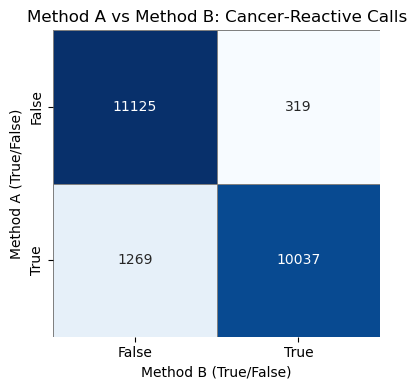

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 4))
sns.heatmap(
    conf_table,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    linewidths=0.5,
    linecolor="gray",
)
plt.title("Method A vs Method B: Cancer‐Reactive Calls")
plt.xlabel("Method B (True/False)")
plt.ylabel("Method A (True/False)")
plt.tight_layout()
plt.show()


In [64]:
# Create a column
merged["agree"] = merged["methodA_reactive"] == merged["methodB_reactive"]

# For each library.id, compute #cells and %agreement
by_lib = (
    merged
    .groupby("library.id")
    .agg(
        total_cells=("agree", "size"),
        n_agree=("agree", "sum")
    )
    .reset_index()
)
by_lib["pct_agree"] = by_lib["n_agree"] / by_lib["total_cells"]

by_lib


,library.id,total_cells,n_agree,pct_agree
0,BC-P20190123-T,203,31,0.152709
1,BC-P20190403-T,383,178,0.464752
2,ESCA-P20181114-T,596,546,0.916107
3,ESCA-P20181123-T,607,566,0.932455
4,ESCA-P20190404-T,351,343,0.977208
5,ESCA-P20190410-T,973,928,0.953751
6,ESCA-P20190411-T,823,788,0.957473
7,ESCA-P20190613-T,714,658,0.921569
8,ESCA-P20190916-T,11,11,1.000000
9,MM-P20181219-T,342,339,0.991228


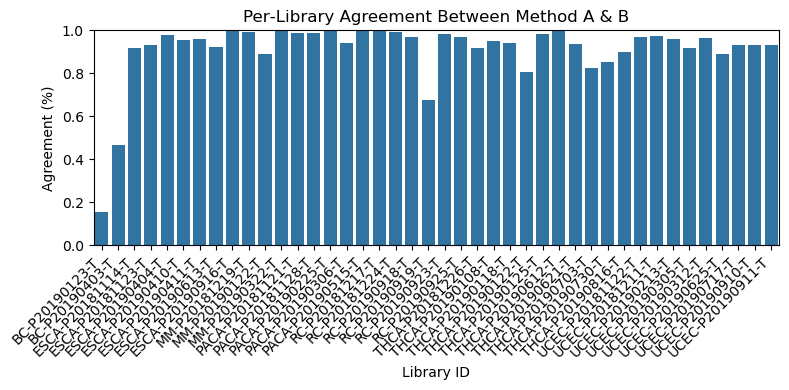

In [65]:
plt.figure(figsize=(8, 4))
sns.barplot(data=by_lib, x="library.id", y="pct_agree")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Agreement (%)")
plt.xlabel("Library ID")
plt.title("Per‐Library Agreement Between Method A & B")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

CD4:

In [66]:

df_A = pd.read_csv("CD4_cancer_reactive_status.tsv", sep="\t")

df_B = pd.read_csv("cell_meta_data_CD4.csv", index_col=[0, 1])

df_B['barcode'] = df_B.index.get_level_values(0).str.split('-').str[0]
df_B["cancer_reactive"] = (
    df_B["cancer_reactive_per_cell"] 
  & df_B["cancer_reactive_by_cluster"]
)
df_B = df_B.groupby(['barcode', 'library.id']).first().reset_index()


df_A["methodA_reactive"] = df_A["CD4_cancer_reactive"].map({"yes": True, "no": False})

df_B["methodB_reactive"] = df_B["cancer_reactive"].astype(bool)

merged = pd.merge(
    df_A[["barcode", "library.id", "methodA_reactive"]],
    df_B[["barcode", "library.id", "methodB_reactive"]].reset_index(),
    on=["barcode", "library.id"],
    how="inner",  # only keep barcodes present in both
    validate="one_to_one" 
)

print(f"Total cells after merge: {len(merged)}")
merged.head()

print("In A but not in B:", len(df_A) - len(merged))
print("In B but not in A:", len(df_B) - len(merged))

conf_table = pd.crosstab(
    merged["methodA_reactive"],
    merged["methodB_reactive"],
    rownames=["Method A"],
    colnames=["Method B"],
)
conf_table

Total cells after merge: 16200
In A but not in B: 727
In B but not in A: 50404


Method B,False,True
Method A,,
False,11110,190
True,1409,3491
